## Airline Tweets Sentiment Analysis

**PURPOSE**: Use NLP to build a model to perform sentiment analysis on tweets for various US Airlines

**AUTHOR** : Maureen Wiebe

**DATA SOURCES**:<br> 
- Kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
    
**REV DATE**: 5-27-2021

In [12]:
import pandas as pd 
import numpy as np 
import re
import string
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
pd.set_option('max_colwidth', 400)

In [2]:
tweets = pd.read_pickle('C:/Users/mwalz2/Documents/Python/Springboard/Airline_Tweets/data/interim/tweets.pkl')

### Overview of Dataset

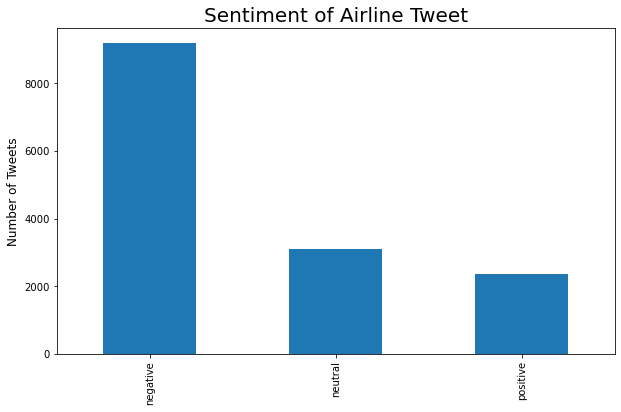

In [11]:
tweets.airline_sentiment.value_counts().plot(kind = 'bar', figsize =(10,6))
plt.ylabel('Number of Tweets', fontsize =12)
plt.title("Sentiment of Airline Tweet", fontsize = 20)
plt.show()

In [26]:
fig = px.bar(pd.DataFrame(tweets.groupby(['airline','airline_sentiment'],as_index = False).tweet_id.count()),x ='airline', y='tweet_id', color ='airline_sentiment', barmode ='stack',
       color_discrete_map ={'negative' :'rgb(214, 39, 40)', 'positive' :'rgb(44, 160, 44)', 'neutral' :'rgb(31, 119, 180)'},title ='Tweet Sentiment by Airline')
fig.update_layout(xaxis_title ='Airline', yaxis_title ='Number of Tweets')

In [31]:
pd.DataFrame(tweets.groupby(['airline','airline_sentiment'],as_index = False).tweet_id.count()).pivot_table(index='airline_sentiment', columns='airline', values='tweet_id', aggfunc ='sum', margins =True)

airline,American,Delta,Southwest,US Airways,United,Virgin America,All
airline_sentiment,,,,,,,
negative,1960,955,1186,2263,2633,181,9178
neutral,463,723,664,381,697,171,3099
positive,336,544,570,269,492,152,2363
All,2759,2222,2420,2913,3822,504,14640


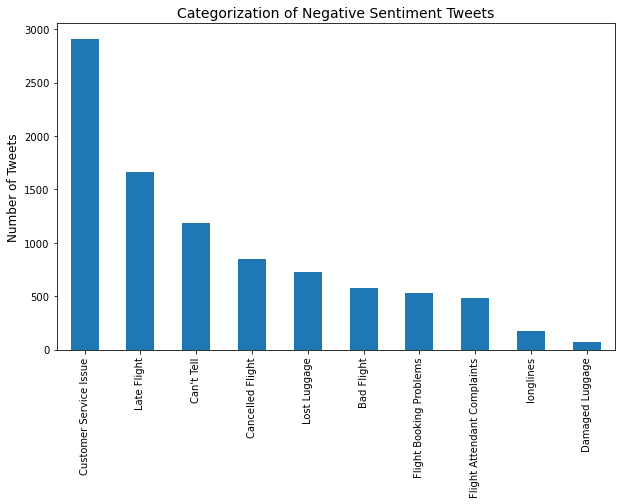

In [30]:
tweets[tweets.airline_sentiment =='negative'].negativereason.value_counts(dropna = False).plot(kind ='bar', figsize =(10,6))
plt.ylabel('Number of Tweets', fontsize =12)
plt.title("Categorization of Negative Sentiment Tweets", fontsize = 14)
plt.show()

### Positive Tweets

In [36]:
positive = tweets.loc[tweets.airline_sentiment =='positive','lemmatizied'].sum()

In [73]:
from nltk import FreqDist
frequency_dist = FreqDist(positive)
frequency_dist.most_common(10)

[('thanks', 607),
 ('thank', 453),
 ('flight', 435),
 ('great', 236),
 ('service', 163),
 ('u', 137),
 ('love', 132),
 ('customer', 123),
 ('guy', 122),
 ('get', 120)]

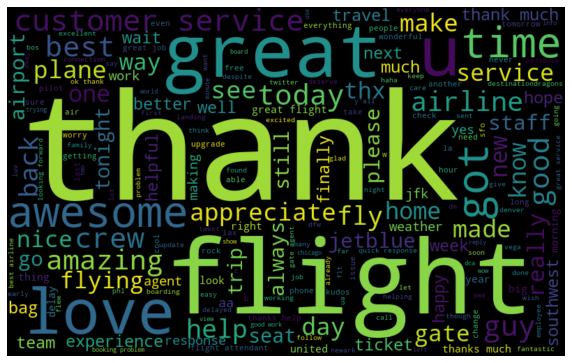

In [51]:
from wordcloud import WordCloud
wordcloud =WordCloud(width =800, height=500).generate_from_text(' '.join(positive))
plt.figure(figsize =(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Negative Tweets

In [54]:
negative = tweets.loc[tweets.airline_sentiment =='negative','lemmatizied'].sum()

In [79]:
frequency_dist = FreqDist(negative)
frequency_dist.most_common(10)

[('flight', 3335),
 ('hour', 1104),
 ('get', 1016),
 ('cancelled', 918),
 ('customer', 773),
 ('service', 765),
 ('u', 757),
 ('...', 741),
 ('time', 737),
 ('bag', 662)]

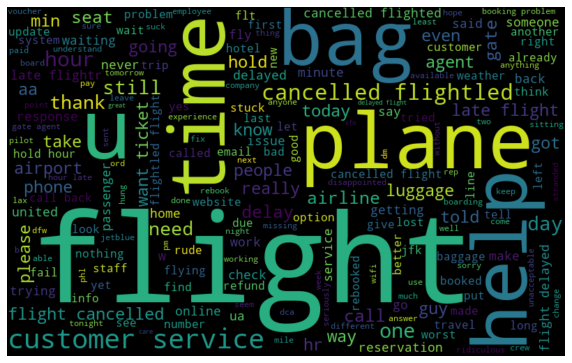

In [56]:
from wordcloud import WordCloud
wordcloud =WordCloud(width =800, height=500).generate_from_text(' '.join(negative))
plt.figure(figsize =(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Neutral Tweets

In [57]:
neutral = tweets.loc[tweets.airline_sentiment =='neutral','lemmatizied'].sum()

In [58]:
frequency_dist = FreqDist(neutral)
frequency_dist.most_common(10)

[('flight', 768),
 ('get', 241),
 ('need', 180),
 ('please', 180),
 ('...', 176),
 ('help', 164),
 ('thanks', 156),
 ('u', 152),
 ('dm', 123),
 ('would', 122)]

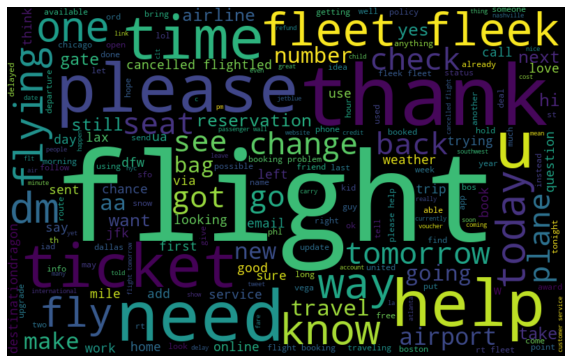

In [59]:
from wordcloud import WordCloud
wordcloud =WordCloud(width =800, height=500).generate_from_text(' '.join(neutral))
plt.figure(figsize =(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Tweet Properties

In [84]:
tweets.groupby('airline_sentiment').agg({"words":['mean','min','max','median']})

words               
                       mean min max median
airline_sentiment                         
negative           9.916431   0  22     10
neutral            7.196838   0  20      7
positive           7.561151   0  26      7

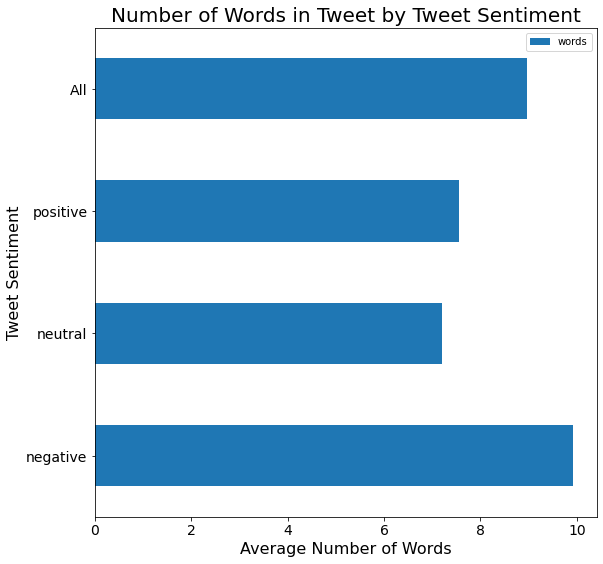

In [93]:
tweets.pivot_table(index ='airline_sentiment',values ='words', aggfunc ='mean', margins = True).plot(kind ='barh', figsize =(9,9))
plt.title("Number of Words in Tweet by Tweet Sentiment", fontsize = 20)
plt.xlabel("Average Number of Words", fontsize = 16)
plt.ylabel("Tweet Sentiment", fontsize = 16)
plt.xticks(fontsize =14 )
plt.yticks(fontsize =14 )
plt.show()

In [109]:
tweets['hashtag_cat']=0
tweets.loc[tweets.hashtag_count>0,'hashtag_cat']=1

In [119]:
hashtags = pd.DataFrame(tweets.pivot_table(index='airline_sentiment', columns ='hashtag_cat', values ='tweet_id',aggfunc ={'tweet_id':'count'}, margins =True).to_records())

hashtags['tweets_hash']=hashtags['1']/hashtags['All']

In [124]:
hashtags

,airline_sentiment,0,1,All,tweets_hash
0,negative,7570,1608,9178,0.175202
1,neutral,2663,436,3099,0.140691
2,positive,1918,445,2363,0.188320
3,All,12151,2489,14640,0.170014


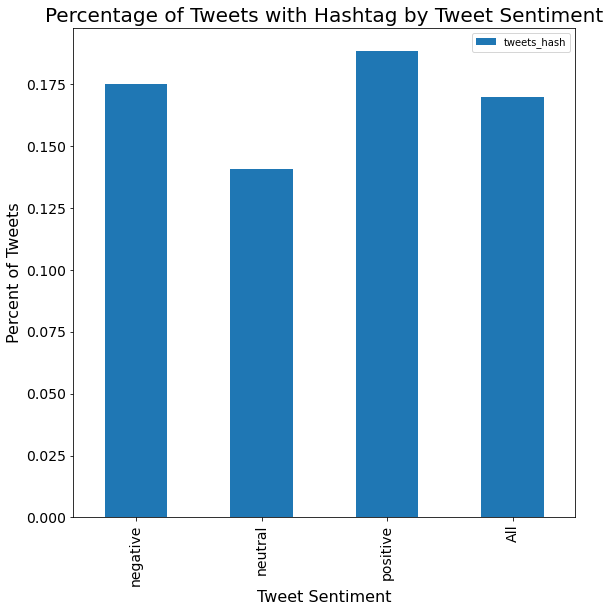

In [127]:
hashtags.plot(kind ='bar',x='airline_sentiment', y='tweets_hash',figsize =(9,9))
plt.title("Percentage of Tweets with Hashtag by Tweet Sentiment", fontsize = 20)
plt.ylabel("Percent of Tweets", fontsize = 16)
plt.xlabel("Tweet Sentiment", fontsize = 16)
plt.xticks(fontsize =14 )
plt.yticks(fontsize =14 )
plt.show()